<a href="https://colab.research.google.com/github/kahiga2244/neural-networks/blob/master/The_Dream_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19  tweet sentiment analysis 

**The placement project**

The dream team  is a cohort of data scientists who use data to derive insights that are useful in decision making. The dream collected, analyzed and predicted a Covid 19  tweet analysis  dataset with the aim of developing a machine learning model to assess if a Twitter post is about covid-19 or not .

**Dataset**: 


##Research objectives

### **Specifying the analytic question**

As Data Scientists, we have been tasked with building a model that determines whether or not a Twitter post is about covid-19.


### **Defining the metrics of success**

Our success will be determined by building a model with the best metrics scores ie the best accuracy score from the classification_report metric and the best classification from Confusion_matric metric. An accuracy score of between 65% and 95%  and an F score close to 1 will be considered ideal 

### **Understanding the context**
Our model will be useful in assisting the health sector in gauging Citizens awareness of Covid 19

### **Recording the Experimental Design**

Below is the expected workflow of our analysis

1.   Data Cleaning and Preparation

*   Load libraries and dataset
*   Deal with mising values
  
2.   Perform EDA

3.  Carry out classification while providing description on how each model.

5.  Make predictions using diffrent Models
6.  Access accuracy of diffrent models
7.  Make conclusions & Challenge the solution



###**Data relevance/ Appropriateness of Data**
Our dataset was relevant for this experiment. Below are the description of the fields:

* ID
* TEXT
* TARGET

## Reading the data

### Importing the necessary libraries

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


import keras
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data

In [ ]:
# Loading in the test & train data 
dtest = pd.read_csv('/content/updated_test.csv')
dtrain = pd.read_csv('/content/updated_train.csv')


## Checking the data

In [ ]:
# Preview of head of train data 
dtrain.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [ ]:
# Preview of tail of train data
dtrain.tail()

,ID,text,target
5282,train_6856,The spread of the novel among asylum seekers o...,1
5283,train_6857,Hundreds of Jewish patients are being treated...,1
5284,train_6858,Beats me Honestly most of the people I follow ...,0
5285,train_6859,Help us reach more people by donating and shar...,0
5286,train_6860,Interest Rate Swap Derivative Pricing in Pytho...,0


In [ ]:
# Preview of head of test data
dtest.head()

,ID,text,target
0,test_2,Why is explained in the video take a look,0
1,test_3,Ed Davey fasting for Ramadan No contest,0
2,test_4,Is Doja Cat good or do you just miss Nicki Minaj,0
3,test_8,How Boris Johnson s cheery wounded in action p...,0
4,test_9,Man it s terrible Not even a reason to get on ...,0


In [ ]:
# Preview of tail of test data
dtest.tail()

,ID,text,target
1957,test_2932,Fageeru meehaa geyga Bandah PUBLIC fundS amp G...,0
1958,test_2934,DFFN Diffusion Pharmaceuticals Announces Pre I...,0
1959,test_2936,I want to wish the Muslim members of Congress ...,0
1960,test_2937,You mean you don t believe there is a conspira...,0
1961,test_2940,Rajavi We call on the United Nations and the S...,0


## Tidying the dataset

In [ ]:
# Summary of the information
dtrain.describe()

,target
count,5287.000000
mean,0.480613
std,0.499671
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Checking the train data shape
print("train dataset shape:", dtrain.shape)

train dataset shape: (5287, 3)


In [ ]:
# Check for Train dataset datatype
dtrain.dtypes


ID        object
text      object
target     int64
dtype: object

In [ ]:
# Sum of null values
dtrain.isnull().sum()

ID        0
text      0
target    0
dtype: int64

In [ ]:
# Check for duplicate 
dtrain.duplicated().any()

False

In [ ]:
# Check for unique values in our dataset
# -----
for columns in dtrain.columns:
  print('/n')
  print(dtrain[columns].unique())

/n
['train_0' 'train_1' 'train_2' ... 'train_6858' 'train_6859' 'train_6860']
/n
['The bitcoin halving is cancelled due to'
 'MercyOfAllah In good times wrapped in its granular detail I challenge myself to find meaning and model the humility t'
 '266 Days No Digital India No Murder of e learning No 2g online business No Restore in J amp k'
 ...
 'Beats me Honestly most of the people I follow are because they are sports fans and I l share their tweets with a sports message board for the sake of shits and giggles'
 'Help us reach more people by donating and sharing our Ramadan flyer To donate please send to our Keystone Bank Account 1009117904 or donate via'
 'Interest Rate Swap Derivative Pricing in Python Harbourfront Technologies']
/n
[1 0]


In [ ]:
# dealing with outliers
#
# Import stats from scipy library
from scipy import stats
num = ['target']
for i, col in enumerate(num):
  z = np.abs(stats.zscore(dtrain[col]))
print(z)


[1.03955611 0.96194904 1.03955611 ... 0.96194904 0.96194904 0.96194904]


In [ ]:
# Confirming that our outliers have been dropped from the dataset.
#
dtrain_o = dtrain[(z < 2)]

print(f"Previous dataframe size : {dtrain.shape[0]}")
print(f"New dataframe size: {dtrain_o.shape[0]}")

Previous dataframe size : 5287
New dataframe size: 5287


In [ ]:
# We remove whitespaces from our rows
# We also ensure that our rows are of the same case
# dtrain_o.columns = dtrain_o.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
# dtrain_o.head()

In [ ]:
# Removing White Space from both columns and rows and converting case to lower case

dtrain_o.columns = dtrain_o.columns.str.strip().str.replace('','').str.lower()

cat = ['text'] 

for i, c in enumerate(cat):
  dtrain_o[c] = dtrain_o[c].str.strip().str.replace('','').str.lower()

In [ ]:
# Clean our text column
# 
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dtrain_o['text'] = dtrain_o['text'].apply(lambda x:clean_text(x))

In [ ]:
# Preview of train dataset

dtrain.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


## EDA

---



---



In [ ]:
# Create subset of train dataset
# df_positive is covid-related tweet 
# df_negative is non covid-related tweet

df_positive = dtrain_o[dtrain_o['target']==1]
df_negative = dtrain_o[dtrain_o['target']==0]

In [ ]:
df_positive.head()

,id,text,target
0,train_0,the bitcoin halving is cancelled due to,1
2,train_2,days no digital india no murder of e learning...,1
3,train_3,india is likely to run out of the remaining rn...,1
8,train_8,frontline health workers are critical in the f...,1
10,train_10,maybe one of the distinguishing features of a ...,1


In [ ]:
# Shape of covid-related tweet  and non covid-related tweet

print("Covid 19 related:",df_positive.shape)
print("Non-Covid 19 related:",df_negative.shape)

Covid 19 related: (2541, 3)
Non-Covid 19 related: (2746, 3)


In [ ]:
# Summary of covid 19 & non-covid related text
# 0 is non covid-related tweets
# 1 is covid-related tweets

Covidtweet = dtrain_o.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
Covidtweet.style.background_gradient(cmap='Blues_r')

,target,text
0,0,2746
1,1,2541


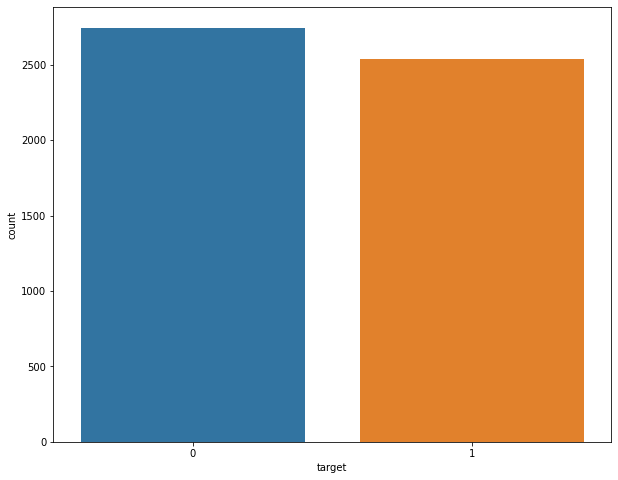

In [ ]:
# Plot of covid & non-covid  related tweets 
plt.figure(figsize=(10,8))

sns.countplot(x="target",data=dtrain_o)

# Our target is balanced

In [ ]:
# Checking for the most common words

from collections import Counter

dtrain_o['Covidtweet_list'] = dtrain_o['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dtrain_o['Covidtweet_list'] for item in sublist])
Covidtweet = pd.DataFrame(top.most_common(25))
Covidtweet.columns = ['Common_words','count']
Covidtweet.style.background_gradient(cmap='Reds')


,Common_words,count
0,the,4193
1,to,3026
2,of,2325
3,and,2078
4,a,1919
5,in,1775
6,is,1406
7,for,1375
8,i,1116
9,s,1060


From the plot above,we can infer that our data is distributed equally

The most common words were mainly articles and connecting words

### Removing stop words

Stop words in NLP are words that are filtered out before or after processing of NLP data e.g "to","the".Search engines are programmed to ignore,both when indexing entries for searching and when retrieving them as a result of a search query

In [ ]:
# Defining stopwords
STOPWORDS = set(stopwords.words("english"))

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
dtrain_o['Covidtweet_list'] = dtrain_o['Covidtweet_list'].apply(lambda x:remove_stopword(x))

In [ ]:
dtrain_o['Covidtweet_list1'] = dtrain_o['Covidtweet_list'].apply(lambda x:str(x).split())
top = Counter([item for sublist in dtrain_o['Covidtweet_list'] for item in sublist])
Covidtweet = pd.DataFrame(top.most_common(25))
Covidtweet.columns = ['Common_words','count']
Covidtweet.style.background_gradient(cmap='Reds')

,Common_words,count
0,ramadan,741
1,sports,403
2,amp,328
3,people,301
4,us,282
5,twitter,253
6,new,252
7,com,250
8,one,245
9,python,244


In [ ]:
Covid_p = dtrain_o[dtrain_o['target']== 1]
Covid_n = dtrain_o[dtrain_o['target']== 0]

In [ ]:
# Most related words to covid 19
top = Counter([item for sublist in Covid_p['Covidtweet_list'] for item in sublist])
Covid_positive = pd.DataFrame(top.most_common(20))
Covid_positive.columns = ['Common_words','count']
Covid_positive.style.background_gradient(cmap='Purples')

,Common_words,count
0,amp,222
1,people,182
2,new,174
3,us,126
4,pandemic,119
5,deaths,104
6,trump,101
7,one,100
8,health,93
9,cases,89


In [ ]:
# Most non covid-related words

top = Counter([item for sublist in Covid_n['Covidtweet_list'] for item in sublist])
Covid_negative = pd.DataFrame(top.most_common(20))
Covid_negative.columns = ['Common_words','count']
Covid_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,ramadan,740
1,sports,401
2,python,244
3,twitter,244
4,com,241
5,pic,233
6,mercyofallah,224
7,food,170
8,month,166
9,learning,162


In [ ]:
# This is a copy of the cleaned data that will be used for modelling

dtrain_c = dtrain_o.copy

In [ ]:
# Mapping out the target column from categorical to string
# 
target_txt = {1:"positive",0:"negative"}
dtrain_o["target"] = dtrain_o["target"].map(target_txt)

In [ ]:
dtrain_o.head()

,id,text,target,Covidtweet_list,Covidtweet_list1
0,train_0,the bitcoin halving is cancelled due to,positive,"[bitcoin, halving, cancelled, due]","[['bitcoin',, 'halving',, 'cancelled',, 'due']]"
1,train_1,mercyofallah in good times wrapped in its gran...,negative,"[mercyofallah, good, times, wrapped, granular,...","[['mercyofallah',, 'good',, 'times',, 'wrapped..."
2,train_2,days no digital india no murder of e learning...,positive,"[days, digital, india, murder, e, learning, on...","[['days',, 'digital',, 'india',, 'murder',, 'e..."
3,train_3,india is likely to run out of the remaining rn...,positive,"[india, likely, run, remaining, rna, kits, ess...","[['india',, 'likely',, 'run',, 'remaining',, '..."
4,train_4,in these tough times the best way to grow is t...,negative,"[tough, times, best, way, grow, learn, case, t...","[['tough',, 'times',, 'best',, 'way',, 'grow',..."


In [ ]:
raw_text = [word for word_list in dtrain_o['Covidtweet_list1'] for word in word_list]

In [ ]:
def words_unique(target,numwords,raw_words):
    allother = []
    for item in dtrain_o[dtrain_o.target != target]['Covidtweet_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in dtrain_o[dtrain_o.target != target]['Covidtweet_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [ ]:
Unique_Positive = words_unique('positive',20,raw_text)
print("The top 20 unique words in Covid-related Tweets are:")
Unique_Positive.style.background_gradient(cmap='Pinks')

The top 20 unique words in Covid-related Tweets are:


,words,count


In [ ]:
Unique_negative = words_unique('negative',20,raw_text)
print("The top 20 unique words in non Covid-related Tweets are:")
Unique_negative.style.background_gradient(cmap='Pinks')

The top 20 unique words in non Covid-related Tweets are:


,words,count


## WordCloud

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=(10,10))
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'


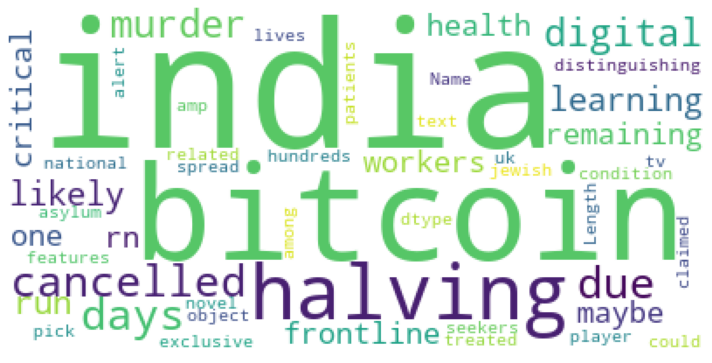

In [ ]:
# Word cloud for the train text column

plot_wordcloud(Covid_p['text'])

# Most used word have a big font

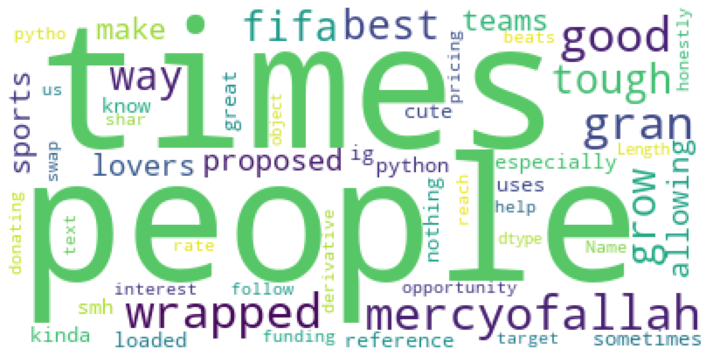

In [ ]:
# Word cloud for the train text column

plot_wordcloud(Covid_n['text'])

# Most used word have a big font

# Building The Model

Simple Neural Network

In [ ]:
# Loading in the test & train data 
dtest = pd.read_csv('/content/updated_test.csv')
dtrain = pd.read_csv('/content/updated_train.csv')


In [ ]:
# Split into test and train sets

X_train = dtrain['text']
y_train = dtrain['target']
X_test = dtest['text']
y_test = dtest['target']

In [ ]:
# create a Keras layer that uses a TensorFlow Hub model to embed the sentences,
#  and try it out on a couple of input examples

import tensorflow as tf
import tensorflow_hub as hub

model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(X_train[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[-0.7041843 ,  0.15388134,  1.0563254 ,  0.8473328 ,  0.18288001,
        -0.8431668 , -0.49527642, -0.21672405, -0.42851803, -0.5328525 ,
        -0.04886663,  0.23051965, -0.8315842 , -0.08369062,  0.2583077 ,
         0.9938026 ,  0.6342579 , -1.0750397 ,  0.5284229 ,  0.16025679],
       [ 1.1747621 , -0.7191744 ,  1.2195085 , -0.03544032, -1.5267428 ,
        -0.8965378 , -1.0072674 ,  0.39809346,  0.6668438 , -0.85907716,
        -0.61024773,  0.3812814 , -0.01545231,  0.621198  , -1.5138758 ,
         0.09773969,  1.7157995 , -1.2480539 , -1.0230833 , -1.0361196 ],
       [-0.8911016 , -0.46230185,  0.9612386 ,  0.56476736, -1.167104  ,
        -0.43873462, -0.6352129 , -1.6592913 ,  0.09238639, -0.70914143,
        -0.9174134 , -1.2876259 ,  0.21700515,  0.4310439 ,  0.8991752 ,
        -1.4679796 , -1.004369  ,  0.8176357 ,  1.4103048 , -0.8398608 ]],
      dtype=float32)>

In [ ]:
# Let's now build the full model:

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Now, configure the model to use an optimizer and a loss function:

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# # Create a validation set

X_train_true = X_train[1963:5287]
X_val = X_train[:1962]
y_train_true = y_train[1963:5287]
y_val = y_train[:1962,]

In [ ]:
# # Train the model

trained = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
21/21 [==============================] - 0s 17ms/step - loss: 0.7332 - accuracy: 0.5145 - val_loss: 0.7022 - val_accuracy: 0.5097
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6726 - accuracy: 0.5247 - val_loss: 0.6517 - val_accuracy: 0.5219
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6273 - accuracy: 0.5566 - val_loss: 0.6071 - val_accuracy: 0.5826
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5837 - accuracy: 0.6306 - val_loss: 0.5640 - val_accuracy: 0.6667
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5417 - accuracy: 0.6966 - val_loss: 0.5229 - val_accuracy: 0.7166
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5020 - accuracy: 0.7369 - val_loss: 0.4849 - val_accuracy: 0.7574
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4656 - accuracy: 0.7666 - val_loss: 0.4503 - val_accuracy: 0.7757
Epoch 8/20
21/21 [=

In [ ]:
# Evaluate the model

results = model.evaluate(X_test, y_test)

print(results)

62/62 [==============================] - 0s 3ms/step - loss: 1.5717 - accuracy: 0.5688
[1.5716843605041504, 0.5688073635101318]




Using Reccurent Neural Network

In [ ]:
# Loading in the test & train data 
dtest = pd.read_csv('/content/updated_test.csv')
dtrain = pd.read_csv('/content/updated_train.csv')


In [ ]:
# Split into test and train sets

X_train = dtrain['text']
y_train = dtrain['target']
X_test = dtest['text']
y_test = dtest['target']

In [ ]:
# Process the data
# Tokenize the data and convert the text to sequences.
# Add padding to ensure that all the sequences have the same shape.

max_words = 1000
max_len = 150
token = Tokenizer(num_words=max_words)
token.fit_on_texts(X_train)
sequences = token.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
# RNN
# Define the RNN structure.

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,100,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(100,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
# Call the function and compile the model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 100)          100000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                42240     
_________________________________________________________________
FC1 (Dense)                  (None, 100)               6500      
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 101 

In [ ]:
# Fit on the training data.

model.fit(sequences_matrix ,y_train,batch_size=256,epochs= 20,
          validation_split=0.4, verbose=1)

Train on 3172 samples, validate on 2115 samples
Epoch 1/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.6700 - accuracy: 0.6151 - val_loss: 0.6136 - val_accuracy: 0.7579
Epoch 2/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.5382 - accuracy: 0.7664 - val_loss: 0.4621 - val_accuracy: 0.8175
Epoch 3/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.3599 - accuracy: 0.8758 - val_loss: 0.5100 - val_accuracy: 0.7423
Epoch 4/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.2680 - accuracy: 0.8975 - val_loss: 0.3856 - val_accuracy: 0.8331
Epoch 5/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.5300 - accuracy: 0.8909 - val_loss: 0.3068 - val_accuracy: 0.8652
Epoch 6/20
3172/3172 [==============================] - 4s 1ms/step - loss: 0.1985 - accuracy: 0.9265 - val_loss: 0.3014 - val_accuracy: 0.8704
Epoch 7/20
3172/3172 [==============================] - 3s 1ms/step - loss: 0.1775 - acc

In [ ]:
# Process the test set data.

test_sequences = token.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
# Evaluate the model on the test set.

accr = model.evaluate(test_sequences_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1962/1962 [==============================] - 1s 709us/step
Test set
  Loss: 2.589
  Accuracy: 0.547


## Conclusion

Our first model gave us an accuracy of 0.57, and a loss of 1.57, using a batch_size of 64 over 20 epochs as hyperparameters. This is not as good as we expected hence we opted to use Recurrent Neural Networks to improve our accuracy.

Using RNN, we used a relu activation funtion, a batchsize of 64 and 20 epoch but the accuracy decreased slightly to 0.547, and loss function decreased to 2.589

Considering that the test set was completely independent from the train set we can say that our model performance was fair.

The poor performance of our model may be due to inadequate training data.



##Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


a). Did we have the right data?

Yes
 
because using the data we were able to conduct an analysis on our analytic question

b). Do we need other data to answer our question?

yes.

The data provided was insufficient

c). Did we have the right question?

yes

We were able to make conclusion from our data